In [4]:
import torch
print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

0
GeForce GTX 1060


In [5]:
%matplotlib inline

import numpy as np
import helper
import matplotlib.pyplot as plt

In [6]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))
                               ])

trainset = datasets.MNIST('./MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [7]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


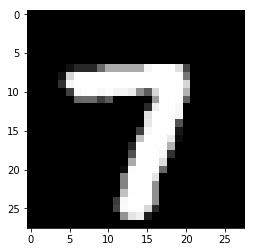

In [8]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [9]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
print(out.shape)

torch.Size([64, 10])


In [10]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

prob = softmax(out)
print(prob.shape)
expec = torch.sum(prob, dim = 1)
print(expec.shape)
print(expec)

torch.Size([64, 10])
torch.Size([64])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [11]:
from torch import nn

In [12]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
        
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [13]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [15]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim = 1)
        
        return x

In [19]:
class MyNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(784, 128)
        self.h2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.softmax(self.out(x), dim = 1)
        
        return x

In [20]:
mynn = MyNN()
mynn

MyNN(
  (h1): Linear(in_features=784, out_features=128, bias=True)
  (h2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [21]:
print(mynn.h1.weight)
print(mynn.h1.bias)

Parameter containing:
tensor([[-0.0081, -0.0074, -0.0048,  ..., -0.0124, -0.0241, -0.0073],
        [-0.0212,  0.0203,  0.0030,  ..., -0.0270,  0.0087,  0.0088],
        [ 0.0179, -0.0154, -0.0154,  ...,  0.0023, -0.0122,  0.0231],
        ...,
        [ 0.0181,  0.0140,  0.0230,  ...,  0.0084,  0.0115,  0.0096],
        [-0.0318,  0.0320,  0.0059,  ...,  0.0228, -0.0056,  0.0337],
        [ 0.0270, -0.0177, -0.0301,  ..., -0.0283, -0.0170,  0.0191]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0164,  0.0345,  0.0132,  0.0273,  0.0141,  0.0188, -0.0226, -0.0330,
         0.0178, -0.0031, -0.0076,  0.0050, -0.0235,  0.0292,  0.0255, -0.0110,
         0.0004,  0.0152,  0.0229,  0.0017, -0.0146,  0.0075, -0.0227,  0.0333,
         0.0252,  0.0268,  0.0012, -0.0091, -0.0339, -0.0233,  0.0164,  0.0071,
        -0.0263, -0.0227,  0.0044,  0.0077,  0.0209, -0.0024,  0.0165,  0.0124,
         0.0100, -0.0261, -0.0307,  0.0177, -0.0215,  0.0172,  0.0193, -0.0058,
         0.0003

In [22]:
mynn.h1.weight.data.fill_(0)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [23]:
mynn.h1.weight.data.normal_(std=0.01)

tensor([[-0.0068, -0.0088,  0.0220,  ...,  0.0006, -0.0126, -0.0044],
        [-0.0009, -0.0021,  0.0145,  ..., -0.0169,  0.0002,  0.0056],
        [ 0.0032, -0.0157, -0.0134,  ..., -0.0123, -0.0106,  0.0008],
        ...,
        [-0.0024,  0.0149,  0.0021,  ...,  0.0051,  0.0014, -0.0077],
        [-0.0077,  0.0204, -0.0145,  ...,  0.0032, -0.0068, -0.0086],
        [ 0.0059,  0.0029,  0.0004,  ...,  0.0001, -0.0008, -0.0181]])

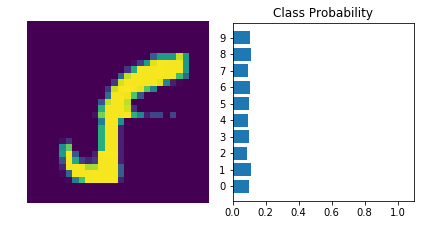

In [29]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(images.shape[0], 1, 784)

img_idx = 0

ps = mynn.forward(images[img_idx, :])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

In [30]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model2 = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim = 1))
print(model2)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


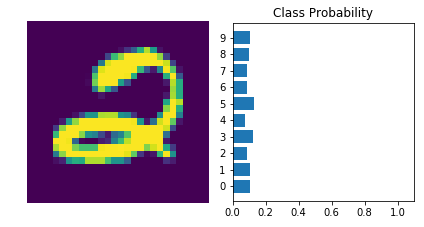

In [31]:
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)

In [32]:
print(model2[0])
model2[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[ 0.0324,  0.0051,  0.0063,  ..., -0.0345, -0.0141,  0.0211],
        [-0.0207, -0.0229,  0.0059,  ...,  0.0043, -0.0271,  0.0161],
        [-0.0122, -0.0059,  0.0166,  ..., -0.0074, -0.0037,  0.0329],
        ...,
        [ 0.0100, -0.0300, -0.0012,  ...,  0.0113, -0.0310, -0.0091],
        [ 0.0270, -0.0311,  0.0102,  ...,  0.0125, -0.0119,  0.0201],
        [ 0.0080,  0.0148, -0.0165,  ...,  0.0342, -0.0352, -0.0140]],
       requires_grad=True)

In [34]:
from collections import OrderedDict
model3 = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))

model3

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)

In [36]:
print(model3[0])
print(model3.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)
